C:\Users\ZYW\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ZYW\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\ZYW\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


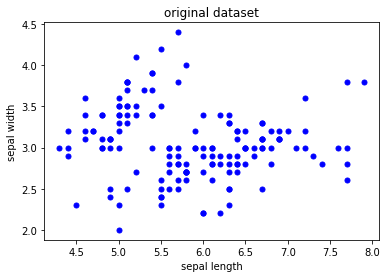

最初的中心= [[6.1 2.8]
 [5.7 4.4]
 [6.  2.2]]
the SSE of 1th iteration is 122.020000
the SSE of 2th iteration is 64.809349
the SSE of 3th iteration is 42.801063
the SSE of 4th iteration is 39.320288
the SSE of 5th iteration is 38.423762
the SSE of 6th iteration is 37.912536
the SSE of 7th iteration is 37.423306
the SSE of 8th iteration is 37.136261
the SSE of 9th iteration is 37.123702


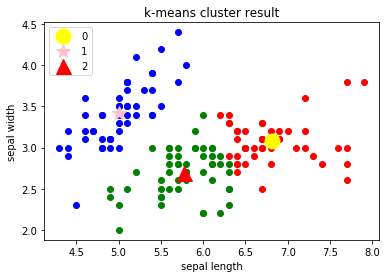

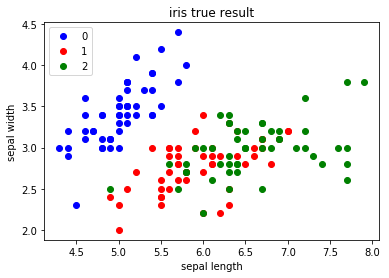

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
# 鸢（yuan1）尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。
# 可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # 5列
dataset = pd.read_csv(url, names=names)
dataset['class'][dataset['class']=='Iris-setosa']=0
dataset['class'][dataset['class']=='Iris-versicolor']=1
dataset['class'][dataset['class']=='Iris-virginica']=2
#对类别进行编码，3个类别分别赋值0，1，2

#计算距离
def distEclud(vecA, vecB):                  #两个向量间欧式距离
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

# #初始化聚类中心：通过在区间范围随机产生的值作为新的中心点
# def randCent(dataSet, k):
#     #获取特征维度
#     n = shape(dataSet)[1]   
#     #创建聚类中心0矩阵 k x n
#     centroids = mat(zeros((k,n)))
#     #遍历n维特征         
#     for j in range(n):     
#         #第j维特征属性值min   ,1x1矩阵                 
#         minJ = min(dataSet[:,j])        
#         #区间值max-min，float数值    
#         rangeJ = float(max(dataSet[:,j]) - minJ)   
#         #第j维，每次随机生成k个中心
#         centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
#     return centroids

# #初始化聚类中心：
def randChosenCent(dataSet,k):
    # 样本数
    m=shape(dataSet)[0]
    # 初始化列表
    centroidsIndex=[]
    #生成类似于样本索引的列表
    dataIndex=list(range(m))
    for i in range(k):
        #生成随机数
        randIndex=random.randint(0,len(dataIndex))
        #将随机产生的样本的索引放入centroidsIndex
        centroidsIndex.append(dataIndex[randIndex])
        #删除已经被抽中的样本
        del dataIndex[randIndex]
    #根据索引获取样本
    centroids = dataSet.iloc[centroidsIndex]
    return mat(centroids)

def kMeans(dataSet, k):
    # 样本总数
    m = shape(dataSet)[0] # 150*2
    #分配样本到最近的簇：存[簇序号,距离的平方]
    # m行  2 列
    clusterAssment = mat(zeros((m,2)))

    #step1:
    #通过随机产生的样本点初始化聚类中心
    centroids = randChosenCent(dataSet, k)
    print('最初的中心=',centroids)

    #标志位，如果迭代前后样本分类发生变化值为True，否则为False
    clusterChanged = True
    #查看迭代次数
    iterTime=0
    #所有样本分配结果不再改变，迭代终止
    while clusterChanged:   
        clusterChanged = False        
        #step2:分配到最近的聚类中心对应的簇中
        for i in range(m):
            #初始定义距离为无穷大
            minDist = inf;
            #初始化索引值
            minIndex = -1
            # 计算每个样本与k个中心点距离
            for j in range(k):
                #计算第i个样本到第j个中心点的距离
                distJI = distEclud(centroids[j,:],dataSet.values[i,:])
                #判断距离是否为最小
                if distJI < minDist:
                    #更新获取到最小距离
                    minDist = distJI
                    #获取对应的簇序号
                    minIndex = j
            #样本上次分配结果跟本次不一样，标志位clusterChanged置True
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2 #分配样本到最近的簇
        iterTime+=1
        sse=sum(clusterAssment[:,1])
        print('the SSE of %d'%iterTime + 'th iteration is %f'%sse)
        #step3:更新聚类中心
        for cent in range(k):#样本分配结束后，重新计算聚类中心
            #获取该簇所有的样本点
            # nonzero函数是numpy中用于得到数组array中非零元素的位置（数组索引）的函数。
            # 它的返回值是一个长度为a.ndim(数组a的轴数)的元组，元组的每个元素都是一个整数数组，其值为非零元素的下标在对应轴上的值。
            ptsInClust = dataSet.iloc[nonzero(clusterAssment[:,0].A==cent)[0]] # python中一个matrix矩阵名.A代表将 矩阵转化为array数组类型.
            #更新聚类中心：axis=0沿列方向求均值。
            centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

# def kMeansSSE(dataSet,k,distMeas=distEclud, createCent=randChosenCent):
#     m = shape(dataSet)[0]
#     #分配样本到最近的簇：存[簇序号,距离的平方]
#     clusterAssment=mat(zeros((m,2)))
#     #step1:#初始化聚类中心
#     centroids = createCent(dataSet, k)
#     print('initial centroids=',centroids)
#     sseOld=0
#     sseNew=inf
#     iterTime=0 #查看迭代次数
#     while(abs(sseNew-sseOld)>0.0001):
#         sseOld=sseNew
#         #step2:将样本分配到最近的质心对应的簇中
#         for i in range(m):
#             minDist=inf;minIndex=-1
#             for j in range(k):
#                 #计算第i个样本与第j个质心之间的距离
#                 distJI=distMeas(centroids[j,:],dataSet.values[i,:])
#                 #获取到第i样本最近的质心的距离,及对应簇序号
#                 if distJI<minDist:
#                     minDist=distJI;minIndex=j
#             clusterAssment[i,:]=minIndex,minDist**2 #分配样本到最近的簇
#         iterTime+=1
#         sseNew=sum(clusterAssment[:,1])
#         print('the SSE of %d'%iterTime + 'th iteration is %f'%sseNew)
#         #step3:更新聚类中心
#         for cent in range(k):
#             #样本分配结束后，重新计算聚类中心
#             ptsInClust=dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
#             #按列取平均,mean()对array类型
#             centroids[cent,:] = mean(ptsInClust, axis=0)
#     return centroids, clusterAssment

#2维数据聚类效果显示
def datashow(dataSet,k,centroids,clusterAssment):  #二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num,dim=shape(dataSet)  #样本数num ,维数dim
    
    if dim!=2:
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples=['or','ob','og','ok','^r','^b','<g'] #样本图形标记
    if k>len(marksamples):
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
    #绘所有样本
    for i in range(num):
        markindex=int(clusterAssment[i,0])#矩阵形式转为int值, 簇序号
        #特征维对应坐标轴x,y；样本图形标记及大小
        # 区分iat,at,iloc,loc;
        # iat,iloc按照索引的位置来进行选取
        # at,loc是按照索引（index）的值来选取
        plt.plot(dataSet.iat[i,0],dataSet.iat[i,1],marksamples[markindex],markersize=6) 

    #绘中心点            
    markcentroids=['o','*','^']#聚类中心图形标记
    label=['0','1','2']
    c=['yellow','pink','red']
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],markcentroids[i],markersize=15,label=label[i],c=c[i])
        plt.legend(loc = 'upper left')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
   
    plt.title('k-means cluster result') #标题        
    plt.show()

#画出实际图像
def trgartshow(dataSet,k,labels):
    from matplotlib import pyplot as plt

    num,dim=shape(dataSet)
    label=['0','1','2']
    marksamples=['ob','or','og','ok','^r','^b','<g']
    # 通过循环的方式，完成分组散点图的绘制
    for i in range(num): 
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[int(labels.iat[i,0])],markersize=6 )
    for i in range(0,num,50): 
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[int(labels.iat[i,0])],markersize=6,label=label[int(labels.iat[i,0])] )
    plt.legend(loc = 'upper left')
    # 添加轴标签和标题

    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
   
    plt.title('iris true result') #标题 

    # 显示图形
    plt.show()   
    #label=labels.iat[i,0]

#聚类前，绘制原始的样本点
def originalDatashow(dataSet):
    #样本的个数和特征维数
    num,dim=shape(dataSet)
    marksamples=['ob'] #样本图形标记
    for i in range(num):
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[0],markersize=5)
    plt.title('original dataset')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') #标题
    plt.show()

if __name__=='__main__':
    #=====kmeans聚类
    # # #获取样本数据
    datamat=dataset.loc[:, ['sepal-length','sepal-width']]
    #真实的标签
    labels=dataset.loc[:, ['class']]
    # #原始数据显示
    originalDatashow(datamat)

    # #*****kmeans聚类
    k=3 #用户定义聚类数
    mycentroids,clusterAssment=kMeans(datamat, k)
    #mycentroids,clusterAssment=kMeansSSE(datamat,k)

    #绘图显示
    datashow(datamat,k,mycentroids,clusterAssment)
    trgartshow(datamat,3,labels)